# Investigation on the trip duration and distance that FordGobike users travel
## by Nattacha Paksung

## Investigation Overview

This project aims at exploring how time features (e.g. time range in a day, day of week) relate to the trip duration and distance. In addition, gender and age of user are expected to correlate to the trip duration and distance as well.

## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in 2017. There are 519,700 observations in the data set with originally 15 features. Seven more features generated from original features were added to the dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
gobike_clean = pd.read_csv('gobike_clean.csv')

In [22]:
# convert 'time_range', 'day_of_week','month' into ordinal categorical types
order_dict = {'time_range' : ['0am-6am', '6am-12am', '12am-6pm', '6pm-12pm'],
             'day_of_week' : ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
             'month' : ['January','February','March','April','May','June','July','August','September','October',
                       'November','December']}
for var in order_dict:
    ordered_cat = pd.api.types.CategoricalDtype(ordered=True,categories = order_dict[var])
    gobike_clean[var] = gobike_clean[var].astype(ordered_cat)

In [23]:
# store data without outliers in 'gobike_no_outlier'
gobike_no_outlier = gobike_clean[(10<=gobike_clean.duration_min) &
                                 (gobike_clean.duration_min<=120)]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of trip duration

When plotting the trip duration on a log-scale, the distribution looks uniform and unimodal. The peak showing the average trip duration of around 10 minutes.

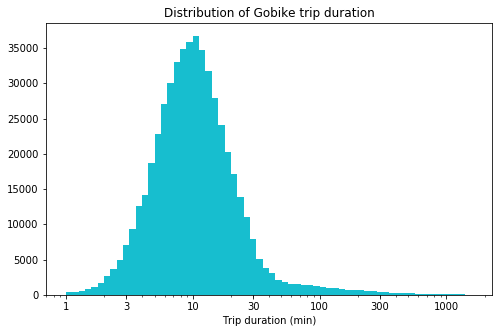

In [10]:
log_binsize = 0.05
bin_edge = 10 ** np.arange(0, np.log10(gobike_clean.duration_min.max())+log_binsize, log_binsize)
base_color = sb.color_palette()[-1]

plt.figure(figsize=[8, 5])
plt.hist(data = gobike_clean, x = 'duration_min', bins = bin_edge,color=base_color)
plt.xscale('log')
bin_loc = [1,3,10,30,100,300,1000]
plt.xticks(bin_loc,bin_loc)
plt.xlabel('Trip duration (min)')
plt.title('Distribution of Gobike trip duration')
plt.show()

## Distribution of trip distance

The trip distance is plotted in a log-scaled. The distribution of both features, trip duration and distance are more or less similar as expected. The peak of the distance curve is around 1.5 km. Note that distance showing here is not the actual distance but the displacement between start and end stations. 

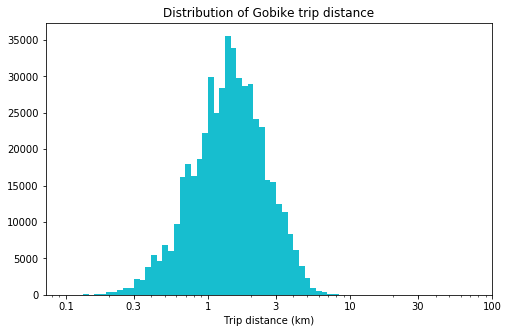

In [12]:
log_binsize = 0.04
bin_edge = 10 ** np.arange(-1, np.log10(gobike_clean.distance.max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = gobike_clean, x = 'distance', bins = bin_edge,color=base_color)
plt.xscale('log')
bin_loc = [0.1,0.3,1,3,10,30,100]
plt.xticks(bin_loc,bin_loc)
plt.xlabel('Trip distance (km)')
plt.title('Distribution of Gobike trip distance')
plt.show()

## Frequency of Gobike usage during different period of time

The time features show that Gobike had more customers in a day time between 6am to 6 pm. More frequency is shown in weekdays (Monday to Friday) rather than weekends (Saturday and Sunday). Unexpectedly, there were no customers from January to May 2017. I suspected that Ford Gobike might not operate during that period, which was correct. Ford Gobike started operating from June 28, 2017. Before that, it was operated under the name Bay Area Bike Share.

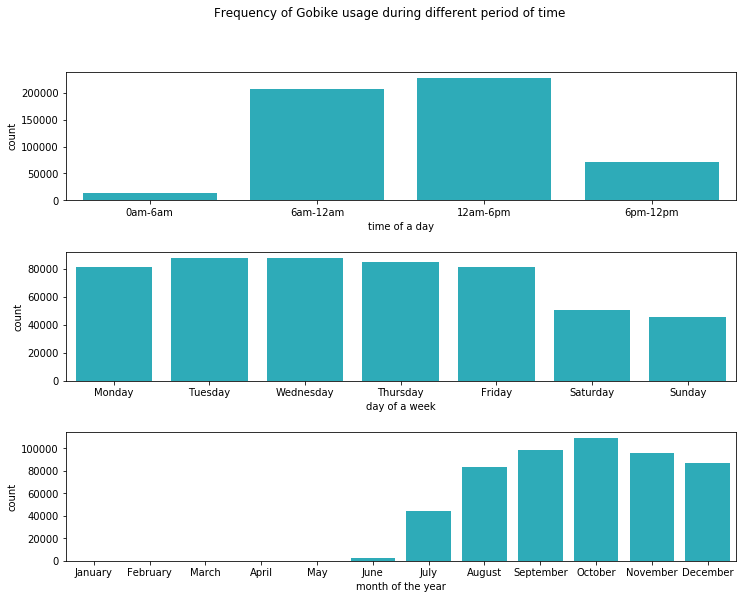

In [19]:
# plot 'time_range', 'day_of_week' and 'month' in count plots
plt.figure(figsize=[12,9])
plt.subplots_adjust(hspace=0.4)

plt.subplot(311)
sb.countplot(x='time_range',data=gobike_clean,color=base_color)
plt.xlabel('time of a day')
plt.subplot(312)
sb.countplot(x='day_of_week',data=gobike_clean,color=base_color)
plt.xlabel('day of a week')
plt.subplot(313)
sb.countplot(x='month',data=gobike_clean,color=base_color)
plt.xlabel('month of the year')
plt.suptitle('Frequency of Gobike usage during different period of time')
plt.show()

## Relationship of trip duration, distance, age and velocity against gender and time features

The trip duration and distance can be engineered a bit by dividing trip distance by duration to obtain velocity. The velocity is from now an additional feature of interest.

In [20]:
#list up numerical and categorical variables
numeric_vars = ['duration_min', 'age', 'distance', 'velocity']
categoric_vars = ['member_gender', 'time_range', 'day_of_week','day_type','month']

In [24]:
# adjust category of month
month = ['June','July','August','September','October',
                       'November','December']
ordered_cat = pd.api.types.CategoricalDtype(ordered=True,categories = month)
gobike_no_outlier.loc[:,'month'] = gobike_no_outlier.loc[:,'month'].astype(ordered_cat)

<Figure size 720x720 with 0 Axes>

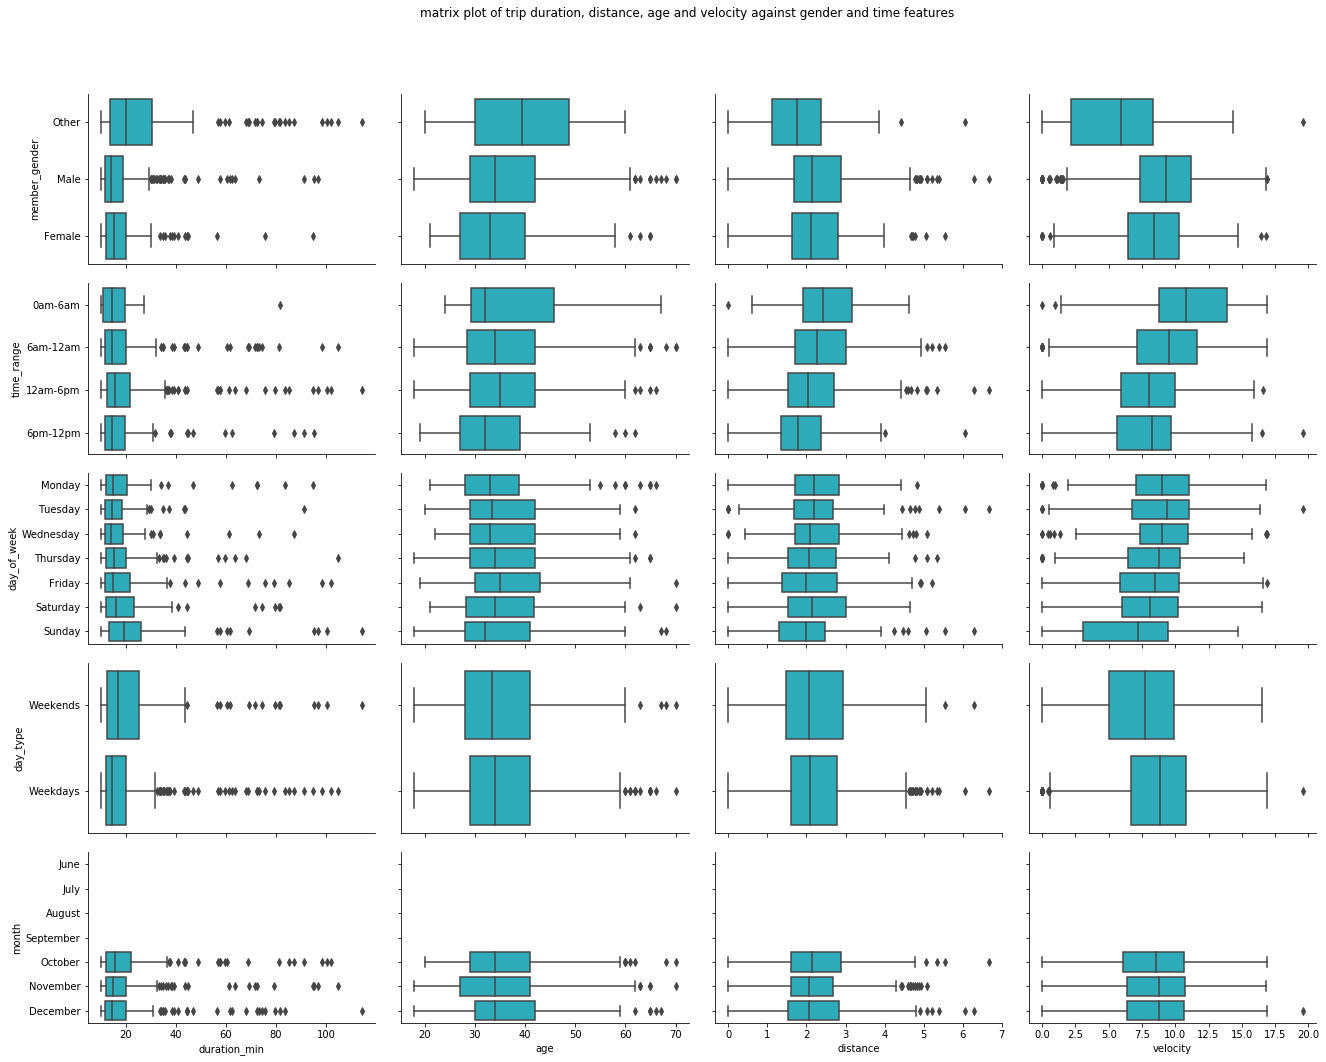

In [37]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(gobike_no_outlier.shape[0], 2000, replace = False)
gobike_samp = gobike_no_outlier.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[-1]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = gobike_samp, x_vars = numeric_vars, y_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('matrix plot of trip duration, distance, age and velocity against gender and time features')
plt.show()

From the plots, some interesting points were found:

- Female members tend to ride a bike longer than male. The distance is not much different. Correspondingly, velocity of male members is averagely faster than female.
- Time of a day looks to give positive correlation with the trip duration. This makes sense when thinking of people rushing to work in the morning.
- Obviously, the trip duration in weekends is longer than weekdays.
- Month of the year does not seem to correlate with duration nor distance.
- In addition, male members are averagely older than female members. Younger people tend to use GoBike in later time than older people. The range of ages is wider in weekends than in weekdays.

## Relationship of genders of GoBike users and time features

Both male and female used GoBike the most around 12am-6pm on weekdays. The ratio of rides in the morning to afternoon is in weekends is lower than weekdays, which mean people tend to use Gobike more in the afternoon during weekends. The month feature does not show any significant correlation with the other features.

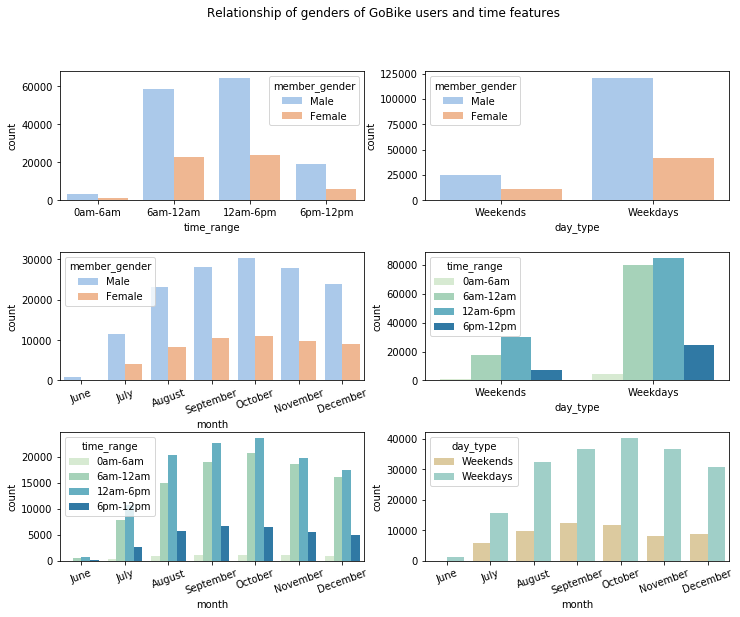

In [38]:
# plot bar chart between member_gender, time_range, day_type and month
plt.figure(figsize=[12,9])
plt.subplots_adjust(hspace=0.4)

plt.subplot(321)
sb.countplot(data=gobike_no_outlier,x='time_range',hue='member_gender',hue_order=['Male','Female'],palette='pastel')

plt.subplot(322)
sb.countplot(data=gobike_no_outlier,x='day_type',hue='member_gender',hue_order=['Male','Female'],palette='pastel')

plt.subplot(323)
sb.countplot(data=gobike_no_outlier,x='month',hue='member_gender',hue_order=['Male','Female'],palette='pastel')
plt.xticks(rotation=20)
#plt.legend(ncol = 2) # re-arrange legend to reduce overlapping

plt.subplot(324)
sb.countplot(data=gobike_no_outlier,x='day_type',hue='time_range',palette='GnBu')
plt.subplot(325)
sb.countplot(data=gobike_no_outlier,x='month',hue='time_range',palette='GnBu')
plt.xticks(rotation=20)

plt.subplot(326)
sb.countplot(data=gobike_no_outlier,x='month',hue='day_type',palette='BrBG')
plt.xticks(rotation=20)

plt.suptitle('Relationship of genders of GoBike users and time features')

plt.show()

## Relationship between age of users and trip duration and distance

Surprisingly, no relationship between age of users and trip duration or distance.

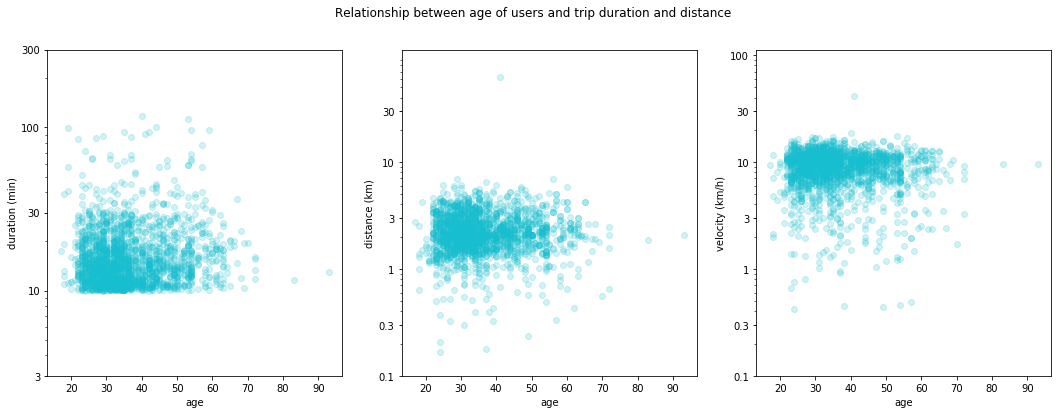

In [40]:
# plot matrix: sample 5000 obseravations so that plots are clearer and
# they render faster
samples = np.random.choice(gobike_no_outlier.shape[0], 5000, replace = False)
gobike_samp = gobike_no_outlier.loc[samples,:]

plt.figure(figsize = [18, 6])

# plot duration_min vs age
plt.subplot(131)
plt.scatter(data=gobike_samp,x='age',y='duration_min',alpha=1/5,color=base_color)
plt.xlabel('age')
plt.ylabel('duration (min)')
plt.yscale('log')
plt.yticks([3,10,30,100,300],[3,10,30,100,300])

# plot distance vs age
plt.subplot(132)
plt.scatter(data=gobike_samp,x='age',y='distance',alpha=1/5,color=base_color)
plt.xlabel('age')
plt.ylabel('distance (km)')
plt.yscale('log')
plt.yticks([0.1,0.3,1,3,10,30],[0.1,0.3,1,3,10,30])

# plot velocity vs age
plt.subplot(133)
plt.scatter(data=gobike_samp,x='age',y='velocity',alpha=1/5,color=base_color)
plt.xlabel('age')
plt.ylabel('velocity (km/h)')
plt.yscale('log')
plt.yticks([0.1,0.3,1,3,10,30,100],[0.1,0.3,1, 3,10,30,100])

plt.suptitle('Relationship between age of users and trip duration and distance')

plt.show()

## The duration, distance and velocity affected by time range and gender variables

From the first plot, it shows that the female members took longer time using GoBike during 12am-6pm than the other time ranges. The male members took shorter time during 6am-12am than the other time ranges. The second plot shows that both male and female members travel in slightly longer distance during 0am-12am than 12am-12pm. The third plot shows similar trend to the second one. That is both male and female members rode GoBike relatively fast during 0am-12am than 12am-12pm.

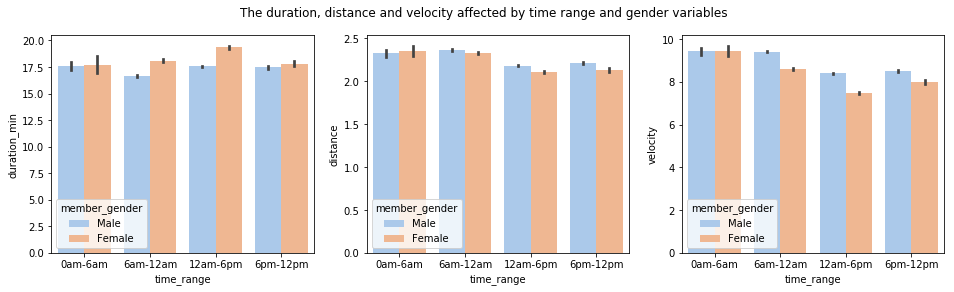

In [39]:
# duration, distance and velocity plot by time range and gender variables
plt.figure(figsize=[16,4])

plt.subplot(131)
sb.barplot(data=gobike_no_outlier,x='time_range',y='duration_min',hue='member_gender',hue_order=['Male','Female'],
            palette='pastel')

plt.subplot(132)
sb.barplot(data=gobike_no_outlier,x='time_range',y='distance',hue='member_gender',hue_order=['Male','Female'],
            palette='pastel')

plt.subplot(133)
sb.barplot(data=gobike_no_outlier,x='time_range',y='velocity',hue='member_gender',hue_order=['Male','Female'],
            palette='pastel')

plt.suptitle('The duration, distance and velocity affected by time range and gender variables')
plt.show()

## The duration, distance and velocity affected by day of week and gender variables

The duration of use among the male and female members did not change much during weekdays (Mon-Fri) and weekends (Sat-Sun); the duration during weekdays was shorter than weekends. Sunday tends to be the day that both male and female members ride the Gobike the shortest distance with slowest velocity.

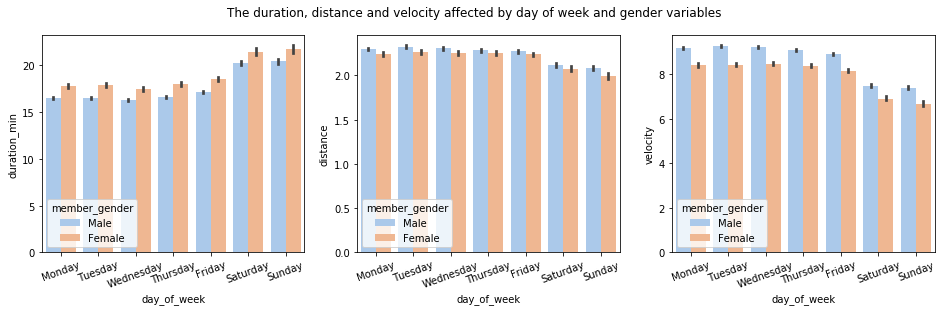

In [41]:
# duration, distance and velocity plot by day of week and gender variables
plt.figure(figsize=[16,4])

plt.subplot(131)
sb.barplot(data=gobike_no_outlier,x='day_of_week',y='duration_min',hue='member_gender',hue_order=['Male','Female'],
            palette='pastel')
plt.xticks(rotation=20)

plt.subplot(132)
sb.barplot(data=gobike_no_outlier,x='day_of_week',y='distance',hue='member_gender',hue_order=['Male','Female'],
            palette='pastel')
plt.xticks(rotation=20)

plt.subplot(133)
sb.barplot(data=gobike_no_outlier,x='day_of_week',y='velocity',hue='member_gender',hue_order=['Male','Female'],
            palette='pastel')
plt.xticks(rotation=20)

plt.suptitle('The duration, distance and velocity affected by day of week and gender variables')

plt.show()

## Relationship of age of users and time range, day of week and gender

The age of the male members are higher than the age of the female members. The age tends to have negative correlation with time range for both male and female. Younger male and female members tend to ride GoBike more during Sat-Sun.

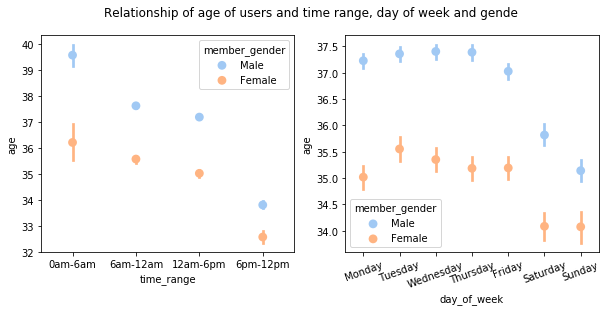

In [42]:
# age plot by time range, day of week and gender variables
plt.figure(figsize=[10,4])

plt.subplot(121)
sb.pointplot(data=gobike_no_outlier,x='time_range',y='age',hue='member_gender',hue_order=['Male','Female'],
            linestyles='', palette='pastel')

plt.subplot(122)
sb.pointplot(data=gobike_no_outlier,x='day_of_week',y='age',hue='member_gender',hue_order=['Male','Female'],
            linestyles='', palette='pastel')
plt.xticks(rotation=20)

plt.suptitle('Relationship of age of users and time range, day of week and gende')

plt.show()